# ipyrad analysis of Hibiscus liliiflorus dataset

Required software
conda install ipyrad -c bioconda
conda install -c bioconda -c ipyrad structure clumpp
conda install toyplot -c eaton-lab

In [1]:
cd /storage1/fs1/christine.e.edwards/Active/mashburn/Hibiscus/3_Hlil/ipyrad

/storage1/fs1/christine.e.edwards/Active/mashburn/Hibiscus/3_Hlil/ipyrad


In [6]:
import ipyrad.analysis as ipa
import toyplot

# input data - create a .snps.hdf file

In [3]:
import pandas as pd

In [4]:
# take a peek at the vcf file
dfchunks = pd.read_csv(
    "/storage1/fs1/christine.e.edwards/Active/mashburn/Hibiscus/3_Hlil/stacks/rerun/Hlil_rerun.vcf.gz",
    sep="\t",
    skiprows=1000,
    chunksize=1000
)

# show the first few rows of the dataframe chunk
next(dfchunks).head()

,10353,26,10353:26,A,C,.,PASS,NS=100;AF=0.495,GT:DP:AD:GQ:GL,"0/1:56:31,25:40:-71.21,0.00,-92.33",...,"0/1:20:11,9:40:-26.74,-0.00,-34.03",./..25,"0/1:18:5,13:40:-41.17,-0.00,-13.89","0/1:37:24,13:40:-35.45,0.00,-73.85",./..26,"0/1:113:72,41:40:-109.37,0.00,-216.89","0/1:39:28,11:40:-27.94,0.00,-87.07","0/1:16:11,5:40:-14.12,-0.00,-35.23","0/1:32:19,13:40:-36.96,0.00,-58.07.1","0/1:22:10,12:40:-36.51,-0.00,-29.97"
0,10356,6,10356:6,A,T,.,PASS,NS=105;AF=0.262,GT:DP:AD:GQ:GL,"0/0:100:100,0:40:0.00,-30.13,-385.73",...,"0/0:90:90,0:40:0.00,-27.12,-347.27","1/1:36:1,35:40:-129.63,-5.89,-0.00","0/0:83:83,0:40:0.00,-25.01,-320.35","0/0:71:71,0:40:0.00,-21.40,-274.20","0/1:41:15,26:40:-87.63,0.00,-46.45","1/1:111:7,104:40:-371.93,-5.38,-0.00","0/0:110:110,0:40:0.00,-33.14,-424.19","0/0:97:97,0:40:-0.00,-29.22,-374.19","0/1:99:48,51:40:-166.32,0.00,-155.91","0/0:32:32,0:40:-0.00,-9.66,-124.20"
1,10366,25,10366:25,C,T,.,PASS,NS=96;AF=0.151,GT:DP:AD:GQ:GL,"0/0:13:13,0:40:-0.00,-4.39,-51.61",...,"0/0:40:40,0:40:-0.00,-12.52,-156.49","0/0:36:36,0:40:-0.00,-11.31,-140.95","0/0:35:35,0:40:-0.00,-11.01,-137.07","0/0:44:44,0:40:-0.00,-13.72,-172.03","0/0:35:35,0:40:-0.00,-11.01,-137.07","0/0:52:52,0:40:0.00,-16.13,-203.11","0/0:30:30,0:40:-0.00,-9.51,-117.65","0/0:15:15,0:40:-0.00,-4.99,-59.38","0/0:17:17,0:40:-0.00,-5.59,-67.15","0/0:9:9,0:38:-0.00,-3.19,-36.07"
2,10368,4,10368:4,T,G,.,PASS,NS=67;AF=0.015,GT:DP:AD:GQ:GL,"0/0:6:6,0:30:-0.00,-2.40,-20.56",...,./.,"0/0:59:55,4:40:-0.00,-5.60,-163.88","0/0:10:10,0:40:-0.00,-3.61,-33.30",./.,./.,"0/0:13:13,0:40:-0.00,-4.51,-42.85","0/0:21:21,0:40:-0.00,-6.91,-68.33","0/0:10:10,0:40:-0.00,-3.61,-33.30","0/0:13:13,0:40:-0.00,-4.51,-42.85",./.
3,10368,8,10368:8,C,A,.,PASS,NS=67;AF=0.015,GT:DP:AD:GQ:GL,"0/0:6:6,0:30:-0.00,-2.40,-18.40",...,./.,"0/0:59:53,4:40:-0.00,-6.42,-139.82","0/0:10:10,0:40:-0.00,-3.60,-29.69",./.,./.,"0/0:13:13,0:40:-0.00,-4.50,-38.16","0/0:21:21,0:40:-0.00,-6.91,-60.75","0/0:10:10,0:40:-0.00,-3.60,-29.69","0/0:13:13,0:40:-0.00,-4.50,-38.16",./.
4,10369,7,10369:7,T,G,.,PASS,NS=104;AF=0.024,GT:DP:AD:GQ:GL,"0/0:90:90,0:40:0.00,-28.52,-317.05",...,"0/0:65:61,4:40:-0.00,-6.99,-201.43",./.,"0/0:69:66,3:40:-0.00,-11.69,-222.45",./.,./.,"1/1:30:0,30:40:-103.40,-8.76,-0.00","0/0:250:249,1:40:0.00,-73.16,-870.64",./.,"0/0:23:23,0:40:-0.00,-8.36,-82.30",./.


In [62]:
## perform the vcf conversion
# set up the converter
converter = ipa.vcf_to_hdf5(
    name="Hlil.rerun",
    data="/storage1/fs1/christine.e.edwards/Active/mashburn/Hibiscus/3_Hlil/stacks/rerun/Hlil_rerun.vcf.gz",
    ld_block_size=35
)

# run the conversion
converter.run(force=True)

Indexing VCF to HDF5 database file
VCF: 2711 SNPs; 2029 scaffolds
[####################] 100% 0:00:01 | converting VCF to HDF5 
HDF5: 2711 SNPs; 2039 linkage group
SNP database written to ./analysis-vcf2hdf5/Hlil.rerun.snps.hdf5


# PCA

In [4]:
# path to the hdf5 file
data = "/storage1/fs1/christine.e.edwards/Active/mashburn/Hibiscus/3_Hlil/structure/analysis-vcf2hdf5/Hlil.rerun.snps.hdf5"
# path to working directory
workdir = "/storage1/fs1/christine.e.edwards/Active/mashburn/Hibiscus/3_Hlil/ipyrad"

In [6]:
# group individuals into populations
imap1 = {
    "outplanted": ["Hlil130", "Hlil132", "Hlil137", "Hlil143", "Hlil145", "Hlil146", "Hlil147", "Hlil148", "Hlil150", "Hlil152", "Hlil153", "Hlil154", "Hlil155", "Hlil156", "Hlil157", "Hlil158", "Hlil159", "Hlil160", "Hlil161", "Hlil162", "Hlil163", "Hlil164", "Hlil165", "Hlil166", "Hlil179", "Hlil180", "Hlil181", "Hlil182", "Hlil183", "Hlil184", "Hlil185", "Hlil186", "Hlil188", "Hlil189", "Hlil190", "Hlil191", "Hlil193", "Hlil195", "Hlil196", "Hlil197", "Hlil198", "Hlil199", "Hlil200", "Hlil201", "Hlil202", "Hlil203", "Hlil204", "Hlil205", "Hlil207", "Hlil208", "Hlil209", "Hlil210", "Hlil211", "Hlil212", "Hlil213", "Hlil214", "Hlil215", "Hlil216", "Hlil217", "Hlil219", "Hlil220", "Hlil221", "Hlil224", "Hlil225", "Hlil226", "Hlil228", "Hlil229", "Hlil231", "Hlil232", "Hlil233", "Hlil235", "Hlil239", "Hlil240", "Hlil241", "Hlil242", "Hlil243", "Hlil244", "Hlil245", "Hlil246", "Hlil247", "Hlil248"],
    "clones": ["Hlil167", "Hlil168", "Hlil169", "Hlil170", "Hlil171", "Hlil172", "Hlil173", "Hlil174", "Hlil175", "Hlil176", "Hlil177", "Hlil178"],
    "ex-situ": ["HlilNBG351", "HlilNTBG260", "HlilWBG226"],
    "wild": ["HlilW222", "HlilW223"]
}

minmap1 = {i: 0 for i in imap1}

In [7]:
# init a PCA
pca = ipa.pca(
    data=data,
    imap=imap1,
    minmap=minmap1,
    impute_method=7
)

Kmeans clustering: iter=0, K=7, mincov=0.9, minmap={'global': 0.1}
Samples: 98
Sites before filtering: 2711
Filtered (indels): 0
Filtered (bi-allel): 0
Filtered (mincov): 2268
Filtered (minmap): 0
Filtered (subsample invariant): 136
Filtered (minor allele frequency): 0
Filtered (combined): 2295
Sites after filtering: 416
Sites containing missing values: 387 (93.03%)
Missing values in SNP matrix: 2112 (5.18%)
SNPs (total): 416
SNPs (unlinked): 372
Imputation: 'sampled'; (0, 1, 2) = 73.6%, 22.6%, 3.8%
{0: ['Hlil173', 'Hlil174', 'Hlil175', 'Hlil219', 'HlilNBG351', 'HlilW223'], 1: ['Hlil143', 'Hlil148', 'Hlil152', 'Hlil153', 'Hlil156', 'Hlil158', 'Hlil159', 'Hlil161', 'Hlil167', 'Hlil170', 'Hlil171', 'Hlil172', 'Hlil176', 'Hlil177', 'Hlil178', 'Hlil211', 'Hlil243', 'Hlil244', 'Hlil246', 'HlilNTBG260', 'HlilWBG226'], 2: ['Hlil162', 'Hlil166', 'Hlil168', 'Hlil169', 'Hlil180', 'Hlil189', 'Hlil193', 'Hlil199', 'Hlil205', 'Hlil224', 'Hlil235', 'Hlil245'], 3: ['Hlil137', 'Hlil157', 'Hlil163', 'H

In [9]:
# run the PCA analysis
pca.run(subsample = False, seed=12345)

In [10]:
# store the PCA axes as a dataframe
#df = pd.DataFrame(pca.pcaxes[0], index=pca.names)

# write the PC axes to a CSV file
#df.to_csv("pca_analysis.csv")

# show the first ten samples of the first 10 PC axes
#df.iloc[:10, :10].round(2)

In [10]:
# plot PC axes 0 and 1
pca.draw(0, 1)

(<toyplot.canvas.Canvas at 0x7f45602b9d90>,
 <toyplot.coordinates.Cartesian at 0x7f45602b9d60>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="300.0px" viewBox="0 0 400.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t6abfb3e21b0a485dbbcf4be975963825"> Hlil130 Hlil132 Hlil137 Hlil143 Hlil145 Hlil146 Hlil147 Hlil148 Hlil150 Hlil152 Hlil153 Hlil154 Hlil155 Hlil156 Hlil157 Hlil158 Hlil159 Hlil160 Hlil161 Hlil162 Hlil163 Hlil164 Hlil165 Hlil166 Hlil167 Hlil168 Hlil169 Hlil170 Hlil171 Hlil172 Hlil173 Hlil174 Hlil175 Hlil176 Hlil177 Hlil178 Hlil179 Hlil180 Hlil181 Hlil182 Hlil183 Hlil184 Hlil185 Hlil186 Hlil188 Hlil189 Hlil190 Hlil191 Hlil193 Hlil195 Hlil196 Hlil197 Hlil198 Hlil199 Hlil200 Hlil201 Hlil202 Hlil203 Hlil204 Hlil205 Hlil207 Hlil208 Hlil209 Hlil210 Hlil211 Hlil212 Hlil213 Hlil214 Hlil215 Hlil216 Hlil217 Hlil219 Hlil220 Hlil221 Hlil224 Hlil225 Hlil226 Hlil228 Hlil229 Hlil231 Hlil232 Hlil233 Hlil235 Hlil239 Hlil240 Hlil241 Hlil242 Hlil243 Hlil244 Hlil245 Hlil246 Hlil247 Hlil248 HlilNBG351 HlilNTBG260 HlilW222 HlilW223 HlilWBG226 -10 0 10 20 PC0 (17.9%) explained -10 0 10 20 PC1 (9.8%) explained outplanted clones ex-situ wild

In [12]:
# save the file
#pca.draw(0,1,outfile="HlilPCA01.pdf")

In [5]:
# by genotype class
imap2 = {
    "Genotype 1": ["Hlil167", "Hlil170", "Hlil171", "Hlil172", "Hlil176", "Hlil177", "Hlil178", "HlilNTBG260", "HlilWBG226", "Hlil143", "Hlil148", "Hlil152", "Hlil153", "Hlil156", "Hlil158", "Hlil159", "Hlil161", "Hlil211", "Hlil243", "Hlil244", "Hlil246"],
    "Genotype 2": ["Hlil173", "Hlil174", "Hlil175", "HlilW223", "HlilNBG351", "Hlil181", "Hlil212", "Hlil219"],
    "Genotype 3": ["Hlil168", "Hlil169"],
    "Genotype 4": ["HlilW222", "Hlil201"],
    "Cross 1x2": ["Hlil130", "Hlil132", "Hlil145", "Hlil146", "Hlil147", "Hlil150", "Hlil154", "Hlil155", "Hlil160", "Hlil165", "Hlil182", "Hlil214", "Hlil248"],
    "Cross 1x3": ["Hlil137", "Hlil157", "Hlil162", "Hlil163", "Hlil164", "Hlil166", "Hlil179", "Hlil180", "Hlil183",  "Hlil185", "Hlil186",  "Hlil190", "Hlil191", "Hlil195", "Hlil196", "Hlil197", "Hlil198", "Hlil199", "Hlil200", "Hlil202", "Hlil203", "Hlil204", "Hlil205", "Hlil207", "Hlil208", "Hlil209", "Hlil210", "Hlil213", "Hlil215", "Hlil216", "Hlil217", "Hlil220", "Hlil221", "Hlil224", "Hlil225", "Hlil226", "Hlil228", "Hlil229",  "Hlil232", "Hlil233", "Hlil240", "Hlil241", "Hlil242"],
    "Cross 2x3": ["Hlil184", "Hlil188", "Hlil189", "Hlil193", "Hlil231", "Hlil235", "Hlil239", "Hlil245", "Hlil247"],
}

minmap2 = {i: 0 for i in imap2}

In [19]:
pca2 = ipa.pca(
    data=data,
    imap=imap2,
    minmap=minmap2,
    impute_method=7,
)
pca2.run(subsample = False, seed = 1)

Kmeans clustering: iter=0, K=7, mincov=0.9, minmap={'global': 0.1}
Samples: 98
Sites before filtering: 2711
Filtered (indels): 0
Filtered (bi-allel): 0
Filtered (mincov): 2268
Filtered (minmap): 0
Filtered (subsample invariant): 136
Filtered (minor allele frequency): 0
Filtered (combined): 2295
Sites after filtering: 416
Sites containing missing values: 387 (93.03%)
Missing values in SNP matrix: 2112 (5.18%)
SNPs (total): 416
SNPs (unlinked): 372
Imputation: 'sampled'; (0, 1, 2) = 74.3%, 21.5%, 4.2%
{0: ['Hlil201', 'HlilW222'], 1: ['Hlil157', 'Hlil162', 'Hlil163', 'Hlil164', 'Hlil179', 'Hlil183', 'Hlil196', 'Hlil197', 'Hlil200', 'Hlil204', 'Hlil205', 'Hlil208', 'Hlil209', 'Hlil213', 'Hlil215', 'Hlil217', 'Hlil220', 'Hlil228', 'Hlil229', 'Hlil233'], 2: ['Hlil168', 'Hlil184', 'Hlil185', 'Hlil186', 'Hlil189', 'Hlil190', 'Hlil191', 'Hlil198', 'Hlil210', 'Hlil216', 'Hlil225', 'Hlil241', 'Hlil242'], 3: ['Hlil130', 'Hlil132', 'Hlil145', 'Hlil146', 'Hlil147', 'Hlil150', 'Hlil154', 'Hlil155', '

In [7]:
# make a color map with these colors
lorange=toyplot.color.css("#E69F00")
lblue=toyplot.color.css("#56B4E9")
green=toyplot.color.css("#009E73")
yellow=toyplot.color.css("#F0E442")
dblue=toyplot.color.css("#0072B2")
dorange=toyplot.color.css("#D55E00")
pink=toyplot.color.css("#CC79A7")

colormap2 = [lblue, lorange, pink, green, yellow, dorange, dblue]

In [8]:
# make a shape map with these shapes
circle=toyplot.marker.create(shape="o")
triangle=toyplot.marker.create(shape="^")

shapemap2 = [circle, circle, circle, circle, triangle, triangle, triangle]

In [20]:
pca2.draw(0, 1, colors=colormap2, shapes=["o", "o", "o", "o", "d", "d", "d"])

(<toyplot.canvas.Canvas at 0x7fc4b6fd8130>,
 <toyplot.coordinates.Cartesian at 0x7fc4b70d50d0>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="300.0px" viewBox="0 0 400.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="td582882b5648451790c7a0a5734d9df6"> Hlil130 Hlil132 Hlil137 Hlil143 Hlil145 Hlil146 Hlil147 Hlil148 Hlil150 Hlil152 Hlil153 Hlil154 Hlil155 Hlil156 Hlil157 Hlil158 Hlil159 Hlil160 Hlil161 Hlil162 Hlil163 Hlil164 Hlil165 Hlil166 Hlil167 Hlil168 Hlil169 Hlil170 Hlil171 Hlil172 Hlil173 Hlil174 Hlil175 Hlil176 Hlil177 Hlil178 Hlil179 Hlil180 Hlil181 Hlil182 Hlil183 Hlil184 Hlil185 Hlil186 Hlil188 Hlil189 Hlil190 Hlil191 Hlil193 Hlil195 Hlil196 Hlil197 Hlil198 Hlil199 Hlil200 Hlil201 Hlil202 Hlil203 Hlil204 Hlil205 Hlil207 Hlil208 Hlil209 Hlil210 Hlil211 Hlil212 Hlil213 Hlil214 Hlil215 Hlil216 Hlil217 Hlil219 Hlil220 Hlil221 Hlil224 Hlil225 Hlil226 Hlil228 Hlil229 Hlil231 Hlil232 Hlil233 Hlil235 Hlil239 Hlil240 Hlil241 Hlil242 Hlil243 Hlil244 Hlil245 Hlil246 Hlil247 Hlil248 HlilNBG351 HlilNTBG260 HlilW222 HlilW223 HlilWBG226 -10 0 10 20 PC0 (18.0%) explained -10 0 10 20 PC1 (9.6%) explained Genotype 1 Genotype 2 Genotype 3 Genotype 4 Cross 1x2 Cross 1x3 Cross 2x3

In [21]:
pca2.draw(0, 1, colors=colormap2, shapes=["o", "o", "o", "o", "d", "d", "d"], outfile="HlilPCAv5.pdf")
pca2.draw(0, 1, colors=colormap2, shapes=["o", "o", "o", "o", "d", "d", "d"], outfile="HlilPCAv5.svg")

(<toyplot.canvas.Canvas at 0x7fc4b71fd910>,
 <toyplot.coordinates.Cartesian at 0x7fc4b70d50a0>)

# plotting structure results

In [7]:
# path (temporary) to the hdf5 file
data = "/storage1/fs1/christine.e.edwards/Active/mashburn/Hibiscus/3_Hlil/structure/analysis-vcf2hdf5/Hlil.rerun.snps.hdf5"
# path to working directory
workdir = "/storage1/fs1/christine.e.edwards/Active/mashburn/Hibiscus/3_Hlil/structure/250k500k/results_f"

In [8]:
# group individuals into populations
imap3 = {
    "wild": ["HlilW222", "HlilW223"],
    "clones": ["Hlil167", "Hlil170", "Hlil171", "Hlil172", "Hlil176", "Hlil178", "Hlil173", "Hlil174", "Hlil175", "Hlil168", "Hlil169"],
    "solitude": ["Hlil211", "Hlil177", "Hlil181", "Hlil212", "Hlil219", "Hlil201", "Hlil182", "Hlil214", "Hlil179", "Hlil180", "Hlil183",  "Hlil185", "Hlil186", "Hlil190", "Hlil191", "Hlil195", "Hlil196", "Hlil197", "Hlil198", "Hlil199", "Hlil200", "Hlil202", "Hlil203", "Hlil204", "Hlil205", "Hlil207", "Hlil208", "Hlil209", "Hlil210", "Hlil213", "Hlil215", "Hlil216", "Hlil217", "Hlil220", "Hlil221", "Hlil184", "Hlil188", "Hlil189", "Hlil193"],
    "grand-montagne": ["Hlil143", "Hlil148", "Hlil152", "Hlil153", "Hlil156", "Hlil158", "Hlil159", "Hlil161", "Hlil130", "Hlil132", "Hlil145", "Hlil146", "Hlil147", "Hlil150", "Hlil154", "Hlil155", "Hlil160", "Hlil137", "Hlil157", "Hlil162", "Hlil163", "Hlil164"],
    "mourouk": ["Hlil243", "Hlil244", "Hlil246", "Hlil224", "Hlil225", "Hlil226", "Hlil228", "Hlil229",  "Hlil232", "Hlil233", "Hlil240", "Hlil241", "Hlil242", "Hlil231", "Hlil235", "Hlil239", "Hlil245", "Hlil247"],
    "plcor/cit": ["Hlil248", "Hlil165", "Hlil166"],
    "ex-situ": ["HlilNBG351", "HlilNTBG260", "HlilWBG226"],
}

In [9]:
# load structure results
str = ipa.structure(
    data=data,
    name="Hlil",
    workdir=workdir,
    imap=imap3,
    load_only=True
)

100 previous results loaded for run [Hlil]


In [10]:
kvalues = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
tables = str.get_clumpp_table(kvalues, max_var_multiple=10)

Nothing to permute or plot for kpop=1, but these results can be used for Evanno.
[K2] 10/10 results permuted across replicates (max_var=10).
[K3] 10/10 results permuted across replicates (max_var=10).
[K4] 10/10 results permuted across replicates (max_var=10).
[K5] 10/10 results permuted across replicates (max_var=10).
[K6] 10/10 results permuted across replicates (max_var=10).
[K7] 10/10 results permuted across replicates (max_var=10).
[K8] 10/10 results permuted across replicates (max_var=10).
[K9] 10/10 results permuted across replicates (max_var=10).
[K10] 10/10 results permuted across replicates (max_var=10).


## Choosing K - evanno method

In [11]:
etable = str.get_evanno_table(kvalues)
etable
# write the table to csv
#etable.to_csv("chooseKtable.csv")

,Nreps,lnPK,lnPPK,deltaK,estLnProbMean,estLnProbStdev
1,10,0.00,0.00,0.000,-167949.96,8.758
2,10,13872.79,6539.46,2918.672,-154077.17,2.241
3,10,7333.33,5264.06,1672.803,-146743.84,3.147
4,10,2069.27,2549.08,232.225,-144674.57,10.977
5,10,-479.81,691.73,0.304,-145154.38,2272.971
6,10,211.92,67.56,0.163,-144942.46,413.338
7,10,279.48,985.15,5.278,-144662.98,186.648
8,10,-705.67,452.64,0.457,-145368.65,991.444
9,10,-253.03,422.85,0.186,-145621.68,2276.668
10,10,-675.88,0.00,0.000,-146297.56,1556.372


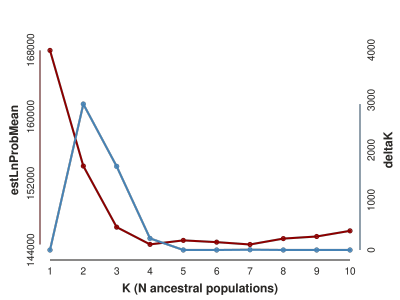

In [12]:
# make canvas object and set size
canvas = toyplot.Canvas(width=400, height=300)

# plot the mean log probability of the models in red
axes = canvas.cartesian(ylabel="estLnProbMean")
axes.plot(etable.estLnProbMean * -1, color="darkred", marker="o")
axes.y.spine.style = {"stroke": "darkred"}

# plot delta K with its own scale bar of left side and in blue
axes = axes.share("x", ylabel="deltaK", ymax=etable.deltaK.max() + etable.deltaK.max() * .25)
axes.plot(etable.deltaK, color="steelblue", marker="o");
axes.y.spine.style = {"stroke": "steelblue"}

# set x labels
axes.x.ticks.locator = toyplot.locator.Explicit(range(len(etable.index)), etable.index)
axes.x.label.text = "K (N ancestral populations)"

# save the file
#import toyplot.pdf
#toyplot.pdf.render(canvas, 'chooseKplot.pdf')

canvas

# Structure plot

In [13]:
table2 = str.get_clumpp_table(2)

[K2] 10/10 results permuted across replicates (max_var=0).


In [67]:
# sort list by columns
#table.sort_values(by=list(range(k)), inplace=True)

In [14]:
# or, sort by list of names taken from imap (or possibly another list)
import itertools
onames = list(itertools.chain(*imap3.values()))
table2 = table2.loc[onames] 
table2

,0,1
HlilW222,0.704,0.296
HlilW223,0.001,0.999
Hlil167,0.000,1.000
Hlil170,0.017,0.983
Hlil171,0.000,1.000
...,...,...
Hlil165,0.001,0.999
Hlil166,0.648,0.352
HlilNBG351,0.001,0.999
HlilNTBG260,0.000,1.000


In [15]:
colorlistk4 = ["#009E73", "#CC79A7", "#56B4E9", "#E69F00", "#F0E442", "#0072B2", "#D55E00"]
cbpalettek4 = toyplot.color.Palette(colorlistk4)
strcolormapk4 = toyplot.color.CategoricalMap(cbpalettek4)
toyplot.color.Palette(cbpalettek4)

In [16]:
colorlistk3 = ["#E69F00", "#56B4E9", "#CC79A7", "#009E73", "#F0E442", "#0072B2", "#D55E00"]
cbpalettek3 = toyplot.color.Palette(colorlistk3)
strcolormapk3 = toyplot.color.CategoricalMap(cbpalettek3)
toyplot.color.Palette(cbpalettek3)

In [17]:
colorlistk5 = ["#F0E442", "#56B4E9", "#E69F00", "#CC79A7", "#009E73", "#0072B2", "#D55E00"]
cbpalettek5 = toyplot.color.Palette(colorlistk5)
strcolormapk5 = toyplot.color.CategoricalMap(cbpalettek5)
toyplot.color.Palette(cbpalettek5)

In [18]:
colorlistk6 = ["#CC79A7", "#009E73", "#56B4E9", "#0072B2", "#E69F00", "#F0E442", "#D55E00"]
cbpalettek6 = toyplot.color.Palette(colorlistk6)
strcolormapk6 = toyplot.color.CategoricalMap(cbpalettek6)
toyplot.color.Palette(cbpalettek6)

In [19]:
import itertools
onames = list(itertools.chain(*imap3.values()))
def hover(table):
    hover = []
    for row in range(table.shape[0]):
        stack = []
        for col in range(table.shape[1]):
            label = "Name: {}\nGroup: {}\nProp: {}"\
                .format(table.index[row], 
                        table.columns[col],
                        table.loc[onames]) # will return a pandas error
            stack.append(label)
        hover.append(stack)
    return list(hover)

In [20]:
import toyplot.svg
import toyplot.pdf
kvalues = [3,4,5,6]
for k in kvalues:
    table = str.get_clumpp_table(k)
    table = table.loc[onames]
    # plot barplot using hover function
    canvas, axes, mark = toyplot.bars(
                            table,
                            title=hover(table),
                            width=1600,
                            height=250,
                            xshow=False,
                            color=strcolormap,
                            )
    kstring = "%s" %k
    toyplot.svg.render(canvas, 'strplotK'+kstring+'_nolabel.svg')
    toyplot.pdf.render(canvas, 'strplotK'+kstring+'_nolabel.pdf')

[K3] 10/10 results permuted across replicates (max_var=0).


NameError: name 'strcolormap' is not defined

In [21]:
table4 = str.get_clumpp_table(4, max_var_multiple=10)
#table4.to_csv("K4admixassign.csv")

# sort by list of names taken from imap (or possibly another list)
import itertools
onames = list(itertools.chain(*imap3.values()))
table4 = table4.loc[onames] 

# build barplot
canvas = toyplot.Canvas(width=1600, height=400)
axes = canvas.cartesian(bounds=("10%", "90%", "10%", "45%"))
axes.bars(table4, color=strcolormap)

# add labels to x-axis
ticklabels = [i for i in table4.index.tolist()]
axes.x.ticks.locator = toyplot.locator.Explicit(labels=ticklabels)
axes.x.ticks.labels.angle = -60
axes.x.ticks.show = True
axes.x.ticks.labels.offset = 10
axes.x.ticks.labels.style = {"font-size": "14px"}

# save the plot for k=4
#import toyplot.svg
#import toyplot.pdf
#toyplot.svg.render(canvas, 'strplotK4_labelled.svg')
#toyplot.pdf.render(canvas, 'strplotK4_labelled.pdf')

canvas

[K4] 10/10 results permuted across replicates (max_var=10).


NameError: name 'strcolormap' is not defined

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1600.0px" height="400.0px" viewBox="0 0 1600.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t64f188db46e742e58acc04bcb37771c2"> -0.5 0.0 0.5 -0.5 0.0 0.5

[K3] 10/10 results permuted across replicates (max_var=10).


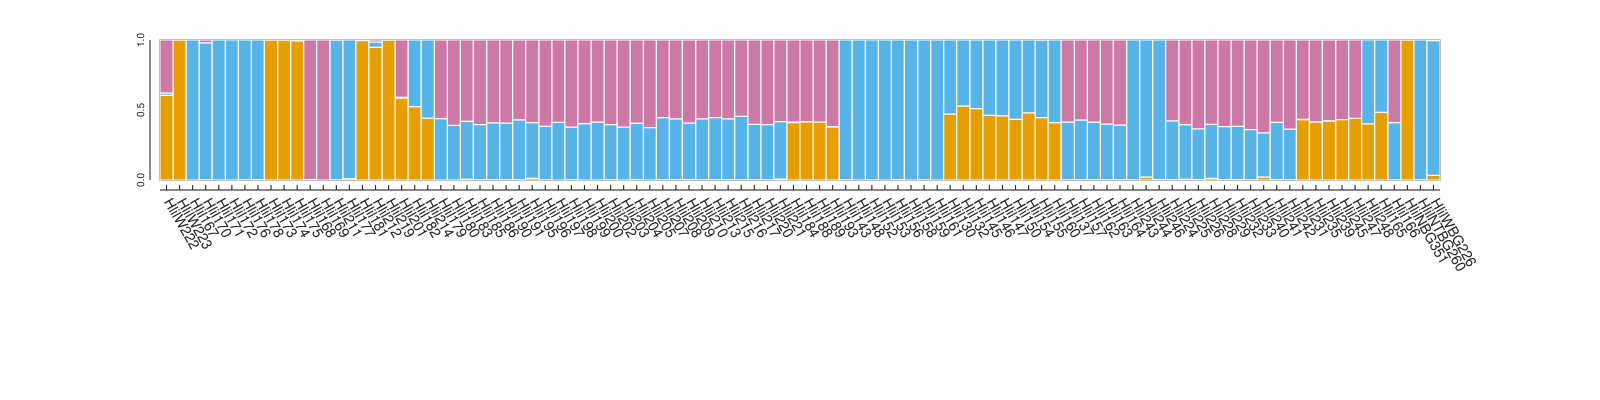

In [22]:
table3 = str.get_clumpp_table(3, max_var_multiple=10)
#table3.to_csv("K4admixassign.csv")

# sort by list of names taken from imap (or possibly another list)
import itertools
onames = list(itertools.chain(*imap3.values()))
table3 = table3.loc[onames] 

# build barplot
canvas = toyplot.Canvas(width=1600, height=400)
axes = canvas.cartesian(bounds=("10%", "90%", "10%", "45%"))
axes.bars(table3, color=strcolormapk3)

# add labels to x-axis
ticklabels = [i for i in table3.index.tolist()]
axes.x.ticks.locator = toyplot.locator.Explicit(labels=ticklabels)
axes.x.ticks.labels.angle = -60
axes.x.ticks.show = True
axes.x.ticks.labels.offset = 10
axes.x.ticks.labels.style = {"font-size": "14px"}

# save the plot for k=4
#import toyplot.svg
#import toyplot.pdf
#toyplot.svg.render(canvas, 'strplotK3_labelled.svg')
#toyplot.pdf.render(canvas, 'strplotK3_labelled.pdf')

canvas

[K5] 10/10 results permuted across replicates (max_var=10).


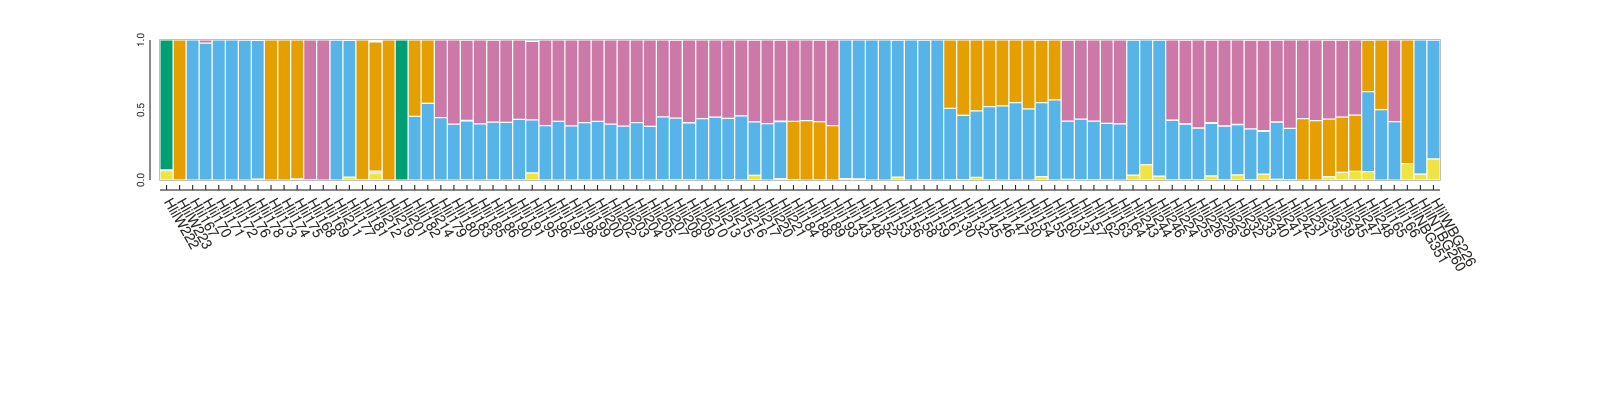

In [23]:
table5 = str.get_clumpp_table(5, max_var_multiple=10)
#table5.to_csv("K5admixassign.csv")

# sort by list of names taken from imap (or possibly another list)
import itertools
onames = list(itertools.chain(*imap3.values()))
table5 = table5.loc[onames] 

# build barplot
canvas = toyplot.Canvas(width=1600, height=400)
axes = canvas.cartesian(bounds=("10%", "90%", "10%", "45%"))
axes.bars(table5, color=strcolormapk5)

# add labels to x-axis
ticklabels = [i for i in table5.index.tolist()]
axes.x.ticks.locator = toyplot.locator.Explicit(labels=ticklabels)
axes.x.ticks.labels.angle = -60
axes.x.ticks.show = True
axes.x.ticks.labels.offset = 10
axes.x.ticks.labels.style = {"font-size": "14px"}

# save the plot for k=4
#import toyplot.svg
#import toyplot.pdf
#toyplot.svg.render(canvas, 'strplotK5_labelled.svg')
#toyplot.pdf.render(canvas, 'strplotK5_labelled.pdf')

canvas

[K6] 10/10 results permuted across replicates (max_var=10).


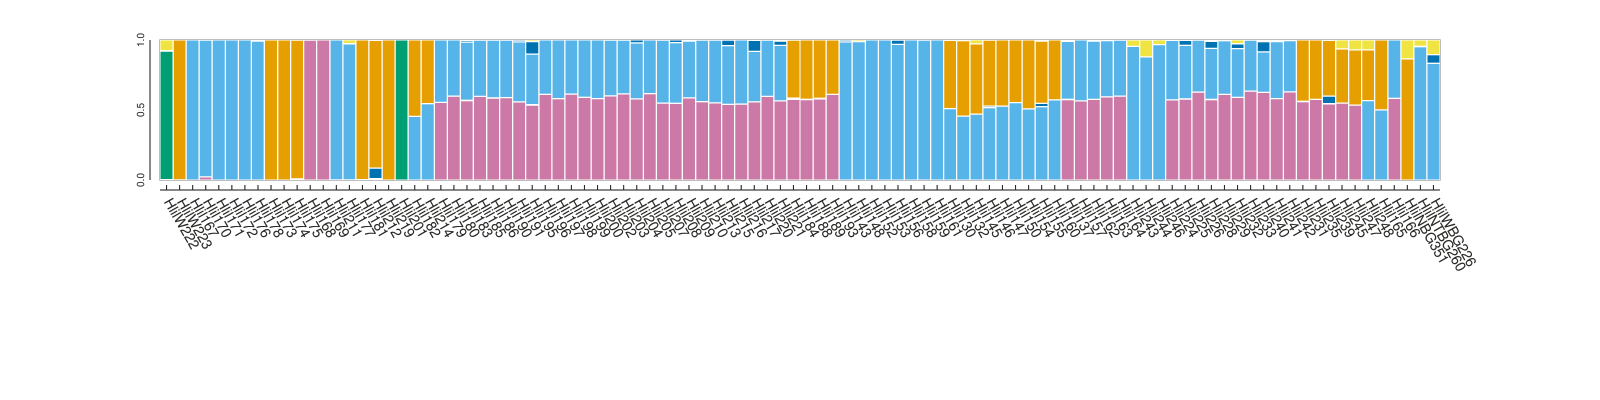

In [69]:
table6 = str.get_clumpp_table(6, max_var_multiple=10)
#table6.to_csv("K6admixassign.csv")

# sort by list of names taken from imap (or possibly another list)
import itertools
onames = list(itertools.chain(*imap3.values()))
table6 = table6.loc[onames] 

# build barplot
canvas = toyplot.Canvas(width=1600, height=400)
axes = canvas.cartesian(bounds=("10%", "90%", "10%", "45%"))
axes.bars(table6, color=strcolormapk6)

# add labels to x-axis
ticklabels = [i for i in table6.index.tolist()]
axes.x.ticks.locator = toyplot.locator.Explicit(labels=ticklabels)
axes.x.ticks.labels.angle = -60
axes.x.ticks.show = True
axes.x.ticks.labels.offset = 10
axes.x.ticks.labels.style = {"font-size": "14px"}

# save the plot for k=6
#import toyplot.svg
#import toyplot.pdf
#toyplot.svg.render(canvas, 'strplotK6_labelled.svg')
#toyplot.pdf.render(canvas, 'strplotK6_labelled.pdf')

canvas